## Demo of continuity correction

When a discrete distribution is approximated by a continuous distribution a continuity correction can be applied for better approximation.

Consider binomial distr. -> normal distr. approximation.

Let $X\sim Binom(N, p)$ and $Y\sim {\cal N}(Np, Np(1-p))$

See [link](https://www.statisticshowto.com/what-is-the-continuity-correction)

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom, norm

def plot_binom_norm_appr(N, p):
    r1 = np.arange(binom.ppf(0.01, N, p), binom.ppf(0.99, N, p))
    r2 = np.arange(binom.ppf(0.01, N, p), binom.ppf(0.99, N, p), 0.1)
    
    x_pdf = binom.pmf(r1, N, p)
    y_pdf = norm.pdf(r2, loc=N*p, scale=np.sqrt(N*p*(1-p))) 
    
    plt.plot(r1, x_pdf, 'ro')
    plt.plot(r2, y_pdf, 'b-')
    plt.legend(['binomial', 'normal']);


For good approximation of binom-norm distr:
1. p should not be close to 0 or 1
2. Np and N(1-p) should be both larger than 5

Lets violate item 1 and see its result

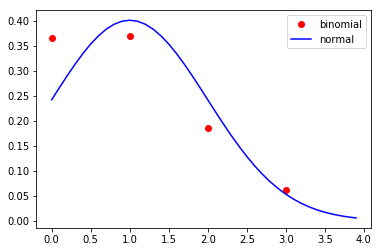

In [13]:
plot_binom_norm_appr(100, 0.01)

Lets violate item 2

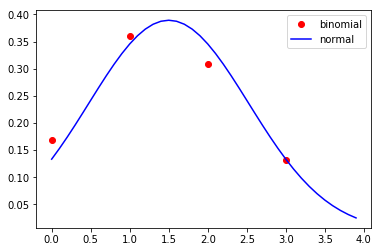

In [15]:
plot_binom_norm_appr(5, 0.3)

Lets conform to both items

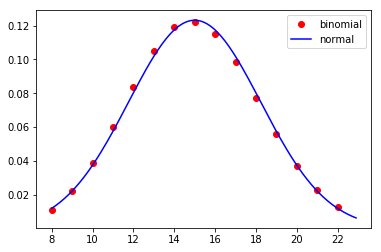

In [16]:
plot_binom_norm_appr(50, 0.3)

Lets compare: P(X=10), f(Y=10), and P(9.5<=Y<=10.5) for N=50 and p=0.3

In [33]:
N = 50
p = 0.3
mu = N*p 
std = np.sqrt(N*p*(1-p))
x =  10

print(f"P(X={x})={binom.pmf(x, N, p):.5f}")
print(f"f(Y={x})={norm.pdf(x, loc=mu, scale=std):.5f}")
print(f"P({x-.5}<=Y<={x+.5})={norm.cdf(x+.5, loc=mu, scale=std)-norm.cdf(x-.5, loc=mu, scale=std):.5f}")

P(X=10)=0.03862
f(Y=10)=0.03744
P(9.5<=Y<=10.5)=0.03764


Lets compare $F_X(10)$, $F_Y(10)$, and $F_Y(10.5)$

In [37]:
N = 50
p = 0.3
mu = N*p 
std = np.sqrt(N*p*(1-p))
x =  10

print(f"F_X({x})={binom.cdf(x,N,p):.5f}")
print(f"F_Y({x})={norm.cdf(x,loc=mu,scale=std):.5f}")
print(f"F_Y({x+.5})={norm.cdf(x+.5,loc=mu,scale=std):.5f}")

F_X(10)=0.07885
F_Y(10)=0.06141
F_Y(10.5)=0.08246
